## Import libraries

In [ ]:
import os
import pandas as pd
from google.colab import drive

## Configure Project Path and other paths

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
proj_path = '/content/drive/MyDrive/Magnimind/Face_detection/MP'
os.chdir(proj_path)

In [ ]:
train_csv_path = os.path.join(proj_path, 'train_3D.csv')
test_csv_path = os.path.join(proj_path, 'test_3D.csv')

## Read data from csv to pandas dataframe

In [ ]:
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [ ]:
train_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,839,Autistic,0.511593,0.709910,-0.040127,0.517181,0.670308,-0.168715,0.515403,...,-0.057532,0.587559,0.500262,-0.077599,0.768636,0.474503,-0.021161,0.784336,0.468965,-0.021392
1,/content/drive/MyDrive/Magnimind/Face_detectio...,825,Autistic,0.566339,0.733220,-0.065258,0.575596,0.677747,-0.127426,0.568713,...,0.001300,0.609449,0.556148,-0.015839,0.738344,0.541875,0.039996,0.751471,0.531839,0.042270
2,/content/drive/MyDrive/Magnimind/Face_detectio...,817,Autistic,0.437217,0.744490,-0.077209,0.426740,0.685478,-0.165941,0.433244,...,-0.018598,0.488665,0.551752,-0.038808,0.656447,0.535078,0.003090,0.674554,0.525373,0.003349
3,/content/drive/MyDrive/Magnimind/Face_detectio...,845,Autistic,0.533727,0.797597,-0.053682,0.549781,0.762331,-0.169223,0.540980,...,-0.035548,0.601406,0.623819,-0.057016,0.766676,0.603243,0.013871,0.782729,0.596054,0.015662
4,/content/drive/MyDrive/Magnimind/Face_detectio...,844,Autistic,0.524054,0.774706,-0.052582,0.505436,0.710976,-0.152662,0.512779,...,-0.039194,0.528307,0.568924,-0.058087,0.683886,0.525732,-0.016595,0.697740,0.517121,-0.017281


In [ ]:
test_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,100,Autistic,0.727391,0.710138,-0.117875,0.753489,0.581854,-0.193980,0.723864,...,0.048919,0.737665,0.421433,0.016144,0.890724,0.401811,0.169311,0.903891,0.394724,0.177334
1,/content/drive/MyDrive/Magnimind/Face_detectio...,108,Autistic,0.457443,0.710929,-0.091133,0.437796,0.633989,-0.193647,0.445459,...,-0.020685,0.482040,0.471925,-0.044690,0.660659,0.437236,0.013672,0.679693,0.424461,0.015152
2,/content/drive/MyDrive/Magnimind/Face_detectio...,106,Autistic,0.452099,0.779923,-0.042830,0.453784,0.726497,-0.181251,0.455887,...,-0.063696,0.546055,0.521134,-0.084867,0.749610,0.499630,-0.035831,0.771000,0.490222,-0.036383
3,/content/drive/MyDrive/Magnimind/Face_detectio...,1,Autistic,0.457504,0.754957,-0.085740,0.470419,0.687706,-0.211908,0.467041,...,-0.034361,0.565713,0.535771,-0.059295,0.783299,0.529403,0.008190,0.804902,0.522787,0.009052
4,/content/drive/MyDrive/Magnimind/Face_detectio...,103,Autistic,0.362426,0.740446,-0.046425,0.366750,0.668341,-0.156865,0.372543,...,-0.048113,0.491366,0.545638,-0.066218,0.686309,0.559731,-0.032427,0.705237,0.556214,-0.034047


In [ ]:
train_df['label'].value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [ ]:
train_df[train_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


In [ ]:
test_df['label'].value_counts()

Autistic        150
Non_Autistic    150
Name: label, dtype: int64

In [ ]:
test_df[test_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


## Setting input features and output features

In [ ]:
X = train_df['img_path']
y = train_df['label']

In [ ]:
y.value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [ ]:
#y = y.map({'Autistic': 1, 'Non_Autistic': 0})

In [ ]:
y.value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True, random_state=72)

In [ ]:
X_test = test_df['img_path']
y_test = test_df['label']
#y_test = y_test.map({'Autistic': 1, 'Non_Autistic': 0})

In [ ]:
# Initializing random_state
random_state = 72

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
from skimage import io, filters
from scipy import ndimage
import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Input shape required by VGG16
IMAGE_WIDTH=512
IMAGE_HEIGHT=512
IMAGE_CHANNELS=3
INP_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
IMAGE_SIZE=(IMAGE_HEIGHT, IMAGE_WIDTH)
BATCH_SIZE = 32

In [ ]:
# Load the pre-trained VGGNet model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=INP_SHAPE)

In [ ]:
# Retrain all the layers
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
#!pip install tensorflow --upgrade

In [ ]:
# Create a new model
model = Sequential()
model.add(vgg_model)

# Add a custom output layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))

# We are using binary classification model to identify whether the given kid
# has autism or not
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 16, 16, 512)       14714688  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                8388672   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23103425 (88.13 MB)
Trainable params: 8388737 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
vggmodel_weights_filepath = 'vggmodel_weights_best.hdf5'
if os.path.exists(vggmodel_weights_filepath):
    model.load_weights(vggmodel_weights_filepath)

In [ ]:
from keras import backend as K

def f1_score(y_true, y_pred):
    # Calculating the number of true positives
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

    # Calculating the number of possible positives (i.e., the total number of actual positives)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    # Calculating the number of predicted positives
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    # Adding epsilon to the denominator to prevent division by zero
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    # Calculating the F1 score
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())

    return f1_val

In [ ]:
from keras.optimizers import Adam
# Set a custom learning rate
learning_rate = 0.0001

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       ])

In [ ]:
callbacks = []

# Saving checkpoints
checkpoint = ModelCheckpoint(vggmodel_weights_filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks.append(checkpoint)

# Define early_stopping.
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               verbose=1,
                               restore_best_weights=True)
callbacks.append(early_stopping)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=3)
callbacks.append(reduce_lr)

In [ ]:
#set a seed
seed = 72
np.random.seed(seed)

In [ ]:
# Concatenate X_train and y_train
train_df = pd.concat([X_train, y_train], axis=1)
# Concatenate X_val and y_val
val_df = pd.concat([X_val, y_val], axis=1)
# Concatenate X_test and y_test
test_df = pd.concat([X_test, y_test], axis=1)

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   brightness_range=[0.5, 1],
                                   horizontal_flip=True)


train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='img_path',
                                                    y_col='label',
                                                    seed=seed,
                                                    # all images will be resized to configured target size,
                                                    target_size=IMAGE_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    classes=['Non_Autistic', 'Autistic'],
                                                    class_mode='binary',
                                                    )


Found 1560 validated image filenames belonging to 2 classes.


In [ ]:
# preprocess_input from VGG
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                x_col='img_path',
                                                y_col='label',
                                                seed=seed,
                                                # all images will be resized to configured target size,
                                                target_size=IMAGE_SIZE,
                                                batch_size=BATCH_SIZE,
                                                classes=['Non_Autistic', 'Autistic'],
                                                class_mode='binary',
                                                )

Found 520 validated image filenames belonging to 2 classes.


In [ ]:
# preprocess_input from VGG
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col='img_path',
                                                  y_col='label',
                                                  seed=seed,
                                                  # all images will be resized to configured target size,
                                                  target_size=IMAGE_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='binary',
                                                  classes=['Non_Autistic', 'Autistic'],
                                                  shuffle=False
                                                )

Found 300 validated image filenames belonging to 2 classes.


In [ ]:
class_indices = train_generator.class_indices
label_names = list(class_indices.keys())

In [ ]:
class_indices

{'Non_Autistic': 0, 'Autistic': 1}

In [ ]:
label_names

['Non_Autistic', 'Autistic']

In [ ]:
y_train.value_counts()

Autistic        953
Non_Autistic    607
Name: label, dtype: int64

In [ ]:
from sklearn.utils import class_weight

# Assuming y_train is a 1D array-like of your labels
weights = class_weight.compute_class_weight('balanced', classes=label_names, y=y_train)

class_weight_dict = {i: weight for i, weight in enumerate(weights)}
class_weight_dict

{0: 1.28500823723229, 1: 0.8184679958027282}

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=25,
                    callbacks=callbacks,
                    class_weight=class_weight_dict,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/25
49/49 [==============================] - ETA: 0s - loss: 1.2843 - accuracy: 0.5827 - precision: 0.7151 - recall: 0.5268
Epoch 1: val_loss improved from inf to 0.53686, saving model to vggmodel_weights_best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


49/49 [==============================] - 163s 3s/step - loss: 1.2843 - accuracy: 0.5827 - precision: 0.7151 - recall: 0.5268 - val_loss: 0.5369 - val_accuracy: 0.7654 - val_precision: 0.7762 - val_recall: 0.8644 - lr: 1.0000e-04
Epoch 2/25
49/49 [==============================] - ETA: 0s - loss: 0.5783 - accuracy: 0.7327 - precision: 0.7786 - recall: 0.7859
Epoch 2: val_loss improved from 0.53686 to 0.50751, saving model to vggmodel_weights_best.hdf5
49/49 [==============================] - 160s 3s/step - loss: 0.5783 - accuracy: 0.7327 - precision: 0.7786 - recall: 0.7859 - val_loss: 0.5075 - val_accuracy: 0.7962 - val_precision: 0.8414 - val_recall: 0.8202 - lr: 1.0000e-04
Epoch 3/25
49/49 [==============================] - ETA: 0s - loss: 0.5398 - accuracy: 0.7506 - precision: 0.7950 - recall: 0.7975
Epoch 3: val_loss improved from 0.50751 to 0.46417, saving model to vggmodel_weights_best.hdf5
49/49 [==============================] - 161s 3s/step - loss: 0.5398 - accuracy: 0.7506 - 

In [ ]:
model.load_weights("vggmodel_weights_best.hdf5")

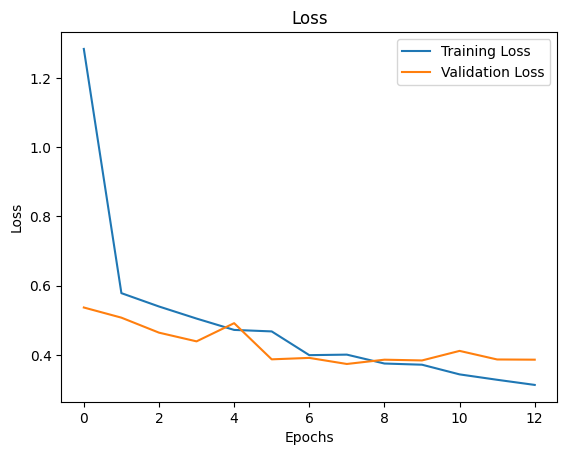

In [ ]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

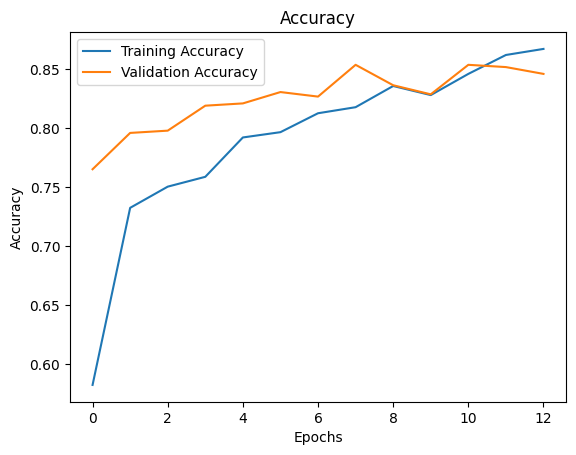

In [ ]:
# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

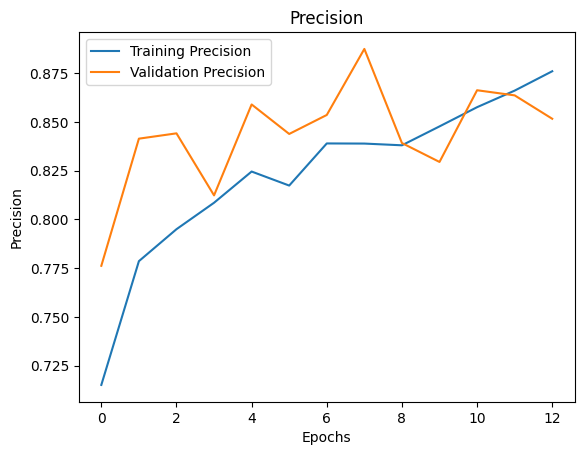

In [ ]:
# Plot the precision curve
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

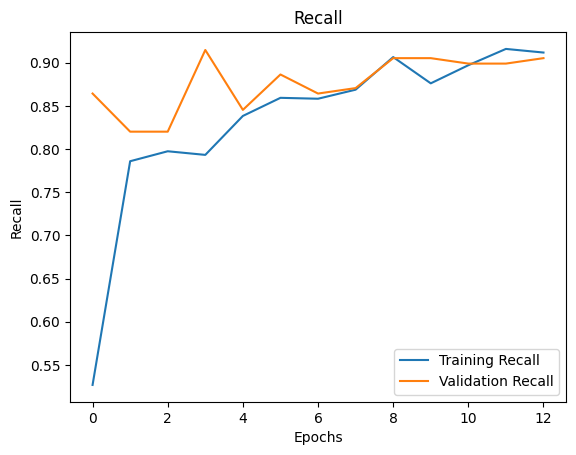

In [ ]:
# Plot the recall curve
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
# Evaluate model on train data
train_eval_results = model.evaluate(train_generator)
print(f'Accuracy: {train_eval_results[1]}')
print(f'Precision: {train_eval_results[2]}')
precision = train_eval_results[2]
recall = train_eval_results[3]
print(f'Precision: {precision}')
print(f'Recall: {recall}')
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1-score: {f1_score}')

49/49 [==============================] - 151s 3s/step - loss: 0.3005 - accuracy: 0.8885 - precision: 0.9401 - recall: 0.8730
Accuracy: 0.8884615302085876
Precision: 0.9401130080223083
Precision: 0.9401130080223083
Recall: 0.8730325102806091
F1-score: 0.9053318788327389


In [ ]:
# Evaluate model on val data
val_eval_results = model.evaluate(val_generator)
print(f'Accuracy: {val_eval_results[1]}')
precision = val_eval_results[2]
recall = val_eval_results[3]
print(f'Precision: {precision}')
print(f'Recall: {recall}')
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1-score: {f1_score}')

17/17 [==============================] - 12s 700ms/step - loss: 0.3736 - accuracy: 0.8538 - precision: 0.8875 - recall: 0.8707
Accuracy: 0.8538461327552795
Precision: 0.8874598145484924
Recall: 0.8706624507904053
F1-score: 0.8789808904033721


In [ ]:
# Evaluate model on test data
test_eval_results = model.evaluate(test_generator)
print(f'Accuracy: {test_eval_results[1]}')
precision = test_eval_results[2]
recall = test_eval_results[3]
print(f'Precision: {precision}')
print(f'Recall: {recall}')
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1-score: {f1_score}')

10/10 [==============================] - 8s 692ms/step - loss: 0.4670 - accuracy: 0.8200 - precision: 0.7667 - recall: 0.9200
Accuracy: 0.8199999928474426
Precision: 0.7666666507720947
Recall: 0.9200000166893005
F1-score: 0.8363636338021141


10/10 [==============================] - 8s 778ms/step


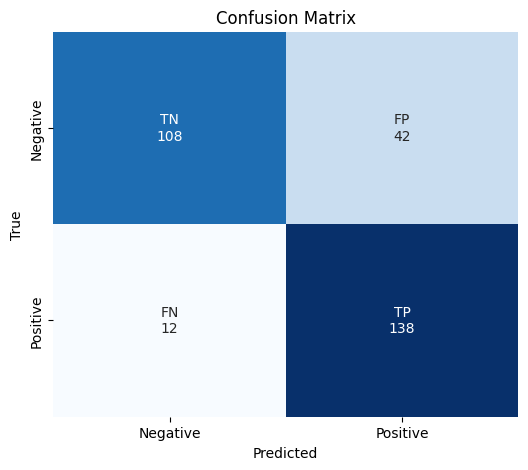

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediction on test set
predictions = model.predict(test_generator)
predictions = predictions.flatten()  # Convert predictions to 1D array if necessary

# Apply 0.5 threshold
predictions_binary = np.where(predictions > 0.5, 1, 0)

# True Labels
# Ensure test_generator labels are in the same order as predictions
true_labels = test_generator.classes

# Compute Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions_binary)

# Extract individual elements
TN, FP, FN, TP = conf_matrix.ravel()

# Create a new confusion matrix with labels
conf_matrix_labelled = np.array([[f"TN\n{TN}", f"FP\n{FP}"], [f"FN\n{FN}", f"TP\n{TP}"]])

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
ax = sns.heatmap(conf_matrix, annot=conf_matrix_labelled, fmt='', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
plt.show()
